In [2]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/mllab/50_Startups.csv')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
def computeCost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    square_err = np.square(predictions - y)
    return 1 / (2 * m) * np.sum(square_err)

In [4]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)

    for i in range(num_iters):
        predictions = X.dot(theta)
        errors = np.dot(X.transpose(), (predictions - y))
        theta -= alpha * (1 / m) * errors
        J_history[i] = computeCost(X, y, theta)

    return theta, J_history

In [5]:
X = data[['R&D Spend', 'Administration', 'Marketing Spend']].values
y = data['Profit'].values.reshape(-1, 1)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

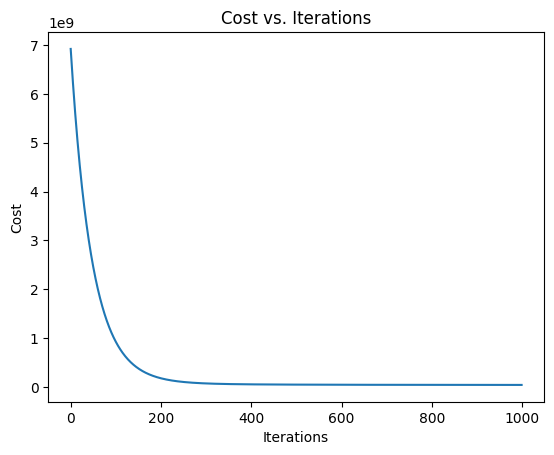

In [7]:
X_b = np.c_[np.ones((len(X_scaled), 1)), X_scaled]
alpha = 0.01
num_iters = 1000
theta = np.random.randn(4, 1)
theta, J_history = gradientDescent(X_b, y, theta, alpha, num_iters)

plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

In [12]:
new_data_point = np.array([165349.2, 136897.8, 471784.1])
new_data_point_scaled = scaler.transform([new_data_point])  # Note the square brackets to make it a 2D array

# Concatenate the constant term (1) with the scaled data point array
new_data_point_b = np.concatenate(([[1]], new_data_point_scaled), axis=1)

# Calculate the predicted profit
predicted_profit = np.dot(new_data_point_b, theta)
print("Predicted Profit for R&D Spend {}: {}".format(new_data_point, predicted_profit[0]))

Predicted Profit for R&D Spend [165349.2 136897.8 471784.1]: [192911.6160418]
